In [2]:
import cv2
import numpy as np

# Load a simple grayscale image
img = cv2.imread('cat.jpeg', cv2.IMREAD_GRAYSCALE)

# Example kernels
blur_kernel = np.ones((3, 3), dtype=np.float32) / 9.0
sharpen_kernel = np.array([[0, -1,  0],
                           [-1, 5, -1],
                           [0, -1,  0]], dtype=np.float32)
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]], dtype=np.float32)

# Apply filter2D (correlation by default in OpenCV; see section 3 for convolution vs correlation)
blurred = cv2.filter2D(img, ddepth=-1, kernel=blur_kernel)
sharpened = cv2.filter2D(img, ddepth=-1, kernel=sharpen_kernel)
edges = cv2.filter2D(img, ddepth=-1, kernel=edge_kernel)

cv2.imwrite('out_blur.png', blurred)
cv2.imwrite('out_sharpen.png', sharpened)
cv2.imwrite('out_edges.png', edges)

True

In [3]:
import numpy as np

def conv2d_valid(img, kernel):
    # Flip kernel for true convolution
    k = np.flipud(np.fliplr(kernel))
    H, W = img.shape
    kh, kw = k.shape
    out_h, out_w = H - kh + 1, W - kw + 1
    out = np.zeros((out_h, out_w), dtype=np.float32)
    for i in range(out_h):
        for j in range(out_w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * k)
    return out

# Example
img = np.array([[0,0,0,0,0],
                [0,50,50,50,0],
                [0,50,100,50,0],
                [0,50,50,50,0],
                [0,0,0,0,0]], dtype=np.float32)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

out = conv2d_valid(img, sobel_x)
print(out)

[[-200.    0.  200.]
 [-300.    0.  300.]
 [-200.    0.  200.]]


In [5]:
import cv2
import numpy as np

img = cv2.imread('cat.jpeg', cv2.IMREAD_GRAYSCALE)

kernels = {
    'blur3': np.ones((3,3), np.float32)/9.0,
    'sharpen': np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], np.float32),
    'sobel_x': np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32),
    'sobel_y': np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
}

feature_maps = {}
for name, k in kernels.items():
    fmap = cv2.filter2D(img, -1, k)
    feature_maps[name] = fmap
    cv2.imwrite(f'feature_{name}.png', fmap)

# Optional: ReLU to emphasize positive detections
for name, fmap in feature_maps.items():
    relu = np.maximum(fmap, 0)
    cv2.imwrite(f'feature_{name}_relu.png', relu)

In [ ]:
# COPY PASTE CONVOLUSI
import tkinter as tk
import numpy as np

# Buat gambar 12x12 dengan kotak putih di tengah
img = np.zeros((12, 12), dtype=np.float32)
img[4:8, 4:8] = 255

# Kernel Sobel horizontal
kernel = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

rows, cols = img.shape
cell_size = 20  # ukuran pixel per cell

# Ukuran feature map (valid convolution, stride=1)
out_h = rows - 2
out_w = cols - 2
feature_map = np.zeros((out_h, out_w))

# Buat window Tkinter
root = tk.Tk()
root.title("Animasi Convolution dengan Tkinter")

# Canvas untuk gambar input
canvas_img = tk.Canvas(root, width=cols*cell_size, height=rows*cell_size, bg="white")
canvas_img.grid(row=0, column=0, padx=10, pady=10)

# Canvas untuk feature map
canvas_feat = tk.Canvas(root, width=out_w*cell_size, height=out_h*cell_size, bg="white")
canvas_feat.grid(row=0, column=1, padx=10, pady=10)

# Gambar input image (kotak hitam/putih)
for i in range(rows):
    for j in range(cols):
        color = "black" if img[i,j]==0 else "white"
        canvas_img.create_rectangle(j*cell_size, i*cell_size,
                                    (j+1)*cell_size, (i+1)*cell_size,
                                    fill=color, outline="gray")

# Kotak merah sebagai jendela kernel
window_rect = canvas_img.create_rectangle(0,0,3*cell_size,3*cell_size,
                                          outline="red", width=3)

# Label untuk menampilkan nilai konvolusi
label = tk.Label(root, text="Nilai konvolusi: ")
label.grid(row=1, column=0, columnspan=2)

positions = [(i,j) for i in range(out_h) for j in range(out_w)]

def animate(idx=0):
    if idx >= len(positions):
        return
    i,j = positions[idx]

    # Geser kotak merah
    canvas_img.coords(window_rect,
                      j*cell_size, i*cell_size,
                      (j+3)*cell_size, (i+3)*cell_size)

    # Ambil patch 3x3
    patch = img[i:i+3, j:j+3]
    val = np.sum(patch * kernel)
    feature_map[i,j] = val

    # Update label
    label.config(text=f"Patch ({i}:{i+3},{j}:{j+3}) → {val:.1f}")

    # Gambar feature map (nilai >0 putih, nilai <=0 hitam)
    canvas_feat.delete("all")
    for r in range(out_h):
        for c in range(out_w):
            v = feature_map[r,c]
            if v > 0:
                gray = int(min(255, v))  # clamp ke 255
                color = f"#{gray:02x}{gray:02x}{gray:02x}"
            else:
                color = "black"
            canvas_feat.create_rectangle(c*cell_size, r*cell_size,
                                         (c+1)*cell_size, (r+1)*cell_size,
                                         fill=color, outline="gray")

    # Jadwalkan frame berikutnya
    root.after(500, animate, idx+1)

# Jalankan animasi
animate()
root.mainloop()


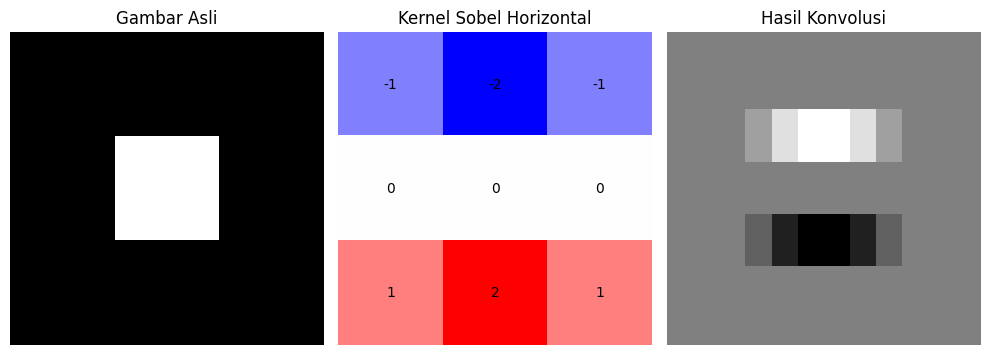

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. Buat gambar 12x12 hitam dengan kotak putih 4x4 di tengah
img = np.zeros((12, 12), dtype=np.float32)
img[4:8, 4:8] = 255

# 2. Kernel Sobel horizontal
kernel_h = np.array([[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]], dtype=np.float32)

# 3. Konvolusi dengan kernel Sobel horizontal
feature_map_h = cv2.filter2D(img, -1, kernel_h)

# 4. Visualisasi dengan matplotlib
plt.figure(figsize=(10,4))

# Gambar asli
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Kernel Sobel horizontal
plt.subplot(1,3,2)
plt.imshow(kernel_h, cmap='bwr')
plt.title("Kernel Sobel Horizontal")
plt.axis('off')
# Tambahkan nilai kernel agar terlihat jelas
for (i,j), val in np.ndenumerate(kernel_h):
    plt.text(j, i, f"{val:.0f}", ha='center', va='center', color='black')

# Hasil konvolusi
plt.subplot(1,3,3)
plt.imshow(feature_map_h, cmap='gray')
plt.title("Hasil Konvolusi")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# COPY PASTE CONVOLUSI
import tkinter as tk
import numpy as np

# Buat gambar 6x6 sederhana
img = np.zeros((6,6), dtype=np.float32)
img[2:4, 2:4] = 255   # kotak putih kecil di tengah

# Kernel Sobel horizontal
kernel = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

rows, cols = img.shape
cell_size = 40  # ukuran pixel per cell

# Feature map ukuran valid (tanpa padding)
out_h = rows - 2
out_w = cols - 2
feature_map = np.zeros((out_h, out_w))

# Tkinter window
root = tk.Tk()
root.title("Animasi Convolution dengan Tkinter")

# Canvas untuk gambar input
canvas_img = tk.Canvas(root, width=cols*cell_size, height=rows*cell_size, bg="white")
canvas_img.grid(row=0, column=0, padx=10, pady=10)

# Canvas untuk feature map
canvas_feat = tk.Canvas(root, width=out_w*cell_size, height=out_h*cell_size, bg="white")
canvas_feat.grid(row=0, column=1, padx=10, pady=10)

# Gambar input (kotak hitam/putih)
for i in range(rows):
    for j in range(cols):
        color = "black" if img[i,j]==0 else "white"
        canvas_img.create_rectangle(j*cell_size, i*cell_size,
                                    (j+1)*cell_size, (i+1)*cell_size,
                                    fill=color, outline="gray")

# Kotak merah sebagai jendela kernel
window_rect = canvas_img.create_rectangle(0,0,3*cell_size,3*cell_size,
                                          outline="red", width=3)

# Label status
label = tk.Label(root, text="Nilai konvolusi: ")
label.grid(row=1, column=0, columnspan=2)

positions = [(i,j) for i in range(out_h) for j in range(out_w)]

def animate(idx=0):
    if idx >= len(positions):
        return
    i,j = positions[idx]

    # Geser kotak merah
    canvas_img.coords(window_rect,
                      j*cell_size, i*cell_size,
                      (j+3)*cell_size, (i+3)*cell_size)

    # Ambil patch 3x3
    patch = img[i:i+3, j:j+3]
    val = np.sum(patch * kernel)
    feature_map[i,j] = val

    # Update label
    label.config(text=f"Patch ({i}:{i+3},{j}:{j+3}) → {val:.1f}")

    # Gambar feature map (nilai >0 putih, nilai <=0 hitam)
    canvas_feat.delete("all")
    for r in range(out_h):
        for c in range(out_w):
            v = feature_map[r,c]
            # Normalisasi sederhana: nilai besar → putih
            color = "black"
            if v > 0:
                gray = int(min(255, v))  # clamp ke 255
                color = f"#{gray:02x}{gray:02x}{gray:02x}"
            canvas_feat.create_rectangle(c*cell_size, r*cell_size,
                                         (c+1)*cell_size, (r+1)*cell_size,
                                         fill=color, outline="gray")

    # Jadwalkan frame berikutnya
    root.after(800, animate, idx+1)

# Jalankan animasi
animate()
root.mainloop()


In [ ]:
# COPY PASTE POLING

import tkinter as tk
import numpy as np

# Buat gambar 6x6 sederhana
img = np.zeros((6,6), dtype=np.float32)
img[2:4, 2:4] = 255   # kotak putih kecil di tengah

# Kernel Sobel horizontal
kernel = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

rows, cols = img.shape
cell_size = 40  # ukuran pixel per cell

# Feature map ukuran valid (tanpa padding)
out_h = rows - 2
out_w = cols - 2
feature_map = np.zeros((out_h, out_w))

# Tkinter window
root = tk.Tk()
root.title("Animasi Convolution + Pooling dengan Tkinter")

# Canvas untuk gambar input
canvas_img = tk.Canvas(root, width=cols*cell_size, height=rows*cell_size, bg="white")
canvas_img.grid(row=0, column=0, padx=10, pady=10)

# Canvas untuk feature map
canvas_feat = tk.Canvas(root, width=out_w*cell_size, height=out_h*cell_size, bg="white")
canvas_feat.grid(row=0, column=1, padx=10, pady=10)

# Canvas untuk hasil pooling
pool_h = out_h // 2
pool_w = out_w // 2
canvas_pool = tk.Canvas(root, width=pool_w*cell_size, height=pool_h*cell_size, bg="white")
canvas_pool.grid(row=0, column=2, padx=10, pady=10)

# Gambar input (kotak hitam/putih)
for i in range(rows):
    for j in range(cols):
        color = "black" if img[i,j]==0 else "white"
        canvas_img.create_rectangle(j*cell_size, i*cell_size,
                                    (j+1)*cell_size, (i+1)*cell_size,
                                    fill=color, outline="gray")

# Kotak merah sebagai jendela kernel
window_rect = canvas_img.create_rectangle(0,0,3*cell_size,3*cell_size,
                                          outline="red", width=3)

# Label status
label = tk.Label(root, text="Nilai konvolusi: ")
label.grid(row=1, column=0, columnspan=3)

positions = [(i,j) for i in range(out_h) for j in range(out_w)]

def draw_feature_map():
    canvas_feat.delete("all")
    for r in range(out_h):
        for c in range(out_w):
            v = feature_map[r,c]
            color = "black"
            if v > 0:
                gray = int(min(255, v))
                color = f"#{gray:02x}{gray:02x}{gray:02x}"
            canvas_feat.create_rectangle(c*cell_size, r*cell_size,
                                         (c+1)*cell_size, (r+1)*cell_size,
                                         fill=color, outline="gray")

def draw_pooling():
    canvas_pool.delete("all")
    pooled = np.zeros((pool_h, pool_w))
    for i in range(pool_h):
        for j in range(pool_w):
            patch = feature_map[i*2:(i+1)*2, j*2:(j+1)*2]
            pooled[i,j] = np.max(patch)   # max pooling
            v = pooled[i,j]
            color = "black"
            if v > 0:
                gray = int(min(255, v))
                color = f"#{gray:02x}{gray:02x}{gray:02x}"
            canvas_pool.create_rectangle(j*cell_size, i*cell_size,
                                         (j+1)*cell_size, (i+1)*cell_size,
                                         fill=color, outline="gray")

def animate(idx=0):
    if idx >= len(positions):
        # setelah selesai konvolusi, tampilkan pooling
        draw_pooling()
        label.config(text="Pooling selesai (max pooling 2x2)")
        return
    i,j = positions[idx]

    # Geser kotak merah
    canvas_img.coords(window_rect,
                      j*cell_size, i*cell_size,
                      (j+3)*cell_size, (i+3)*cell_size)

    # Ambil patch 3x3
    patch = img[i:i+3, j:j+3]
    val = np.sum(patch * kernel)
    feature_map[i,j] = val

    # Update label
    label.config(text=f"Patch ({i}:{i+3},{j}:{j+3}) → {val:.1f}")

    # Gambar feature map
    draw_feature_map()

    # Jadwalkan frame berikutnya
    root.after(800, animate, idx+1)

# Jalankan animasi
animate()
root.mainloop()
